# SPA5666 Midterm Project

## The Luminous Efficiency of an Incandescent Light Bulb

## Introduction

An incandescent light bulb is a simple device - it contains a filament, usually made of tungsten, heated by the flow of electricity until it becomes hot enough to radiate thermally.  Essentially all the power consumed by an incandescent bulb is radiated as electromagnetic energy, but some of the radiation is not in the visible wavelengths, which means that it is useless for lighting purposes.
Here we will use several numerical methods to model the efficiency of an incandescent bulb in producing visible light and determine the temperature at which it is most efficient.
The radiation emitted from a filament at temperature $T$ obeys the Planck radiation law to a good approximation, meaning that the power radiated per unit wavelength $\lambda$ obeys

$$
I(\lambda) = 2 \pi A h c^2 \frac{\lambda^{-5}}{e^{hc/(\lambda k_B T)}-1}, (2)
$$

where $A$ is the surface area of the filament, $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant. 
we can define the efficiency of a light bulb to be the fraction of the radiated energy that falls in the visible band of wavelengths when compared to the total energy radiated at all wavelengths.
The visible portion of the spectrum is between wavelength of $\lambda_1 = 390$ nm and $\lambda_2 = 750$ nm.  The radiative efficiency is expressed as $
\eta(T) = \frac{P_\text{visible}}{P_\text{total}}$ where 

$
P_\text{visible} = \int_{\lambda_1}^{\lambda_2} I(\lambda) d\lambda
$

is the the total power radiated in the visible window $\lambda_1 \rightarrow \lambda_2$ 
and 

$
P_\text{total} = \int_{0}^{\infty} I(\lambda) d\lambda
$

is the total power emitted at all wavelengths.  Making the substitution $x=hc/(\lambda k_B T)$ and using the exact known value of the integral in the denominator, the efficiency of the bulb is then

$$
\eta(T) = \frac{15}{\pi^4}\int_{hc/(\lambda_2 k_B T)}^{hc/(\lambda_1 k_B T)} \frac{x^{3}}{e^{x}-1} \,\mathrm{d} x,
$$

where the leading constants and the area $A$ of the filament have cancelled out.  The value of this integral function for efficiency $\eta(T)$ cannot be determined analytically.
Using several numerical methods find the temperature $T$ where the efficiency $\eta(T)$ of this theoretical blackbody light source is maximised.
This report will feature the Bisection method, the Regula Falsi method, and the Newton step method. We will be using these methods to locate the temperature value for which the efficiency is highest by plotting a graph, to give us a visual aid and a reasonable starting guess. We will then graph the derivative of our efficiency equation. Since we are looking for the maximum of our efficiency, we can say that the x intercept of the derivative curve will be where the gradient of our efficiency curve is zero. That will be where our maxima is located. Once we have obtained the temperature value we can simply put that value back into our efficiency equation to find the maximum efficiency for our range of temperatures.




# Content
## Introduction
## Content
## Methods 
### Method 1 - graphing Efficiency 
- Imports 
- Eff(T) function
- Data Preparation Method
- Data Analysis Method
### Method 2 - Graphing Efficiency Derivative
- Imports
- Functions
- Data Preparation Method
### Methods 3 - Finding an expected root
### Methods 4 - The bisection algorithm & Regula Falsi
- Imports
- Functions
- Looping
- Bisection Method
    - Forward Derivative
    - Extrapolated Derivative
    - Central Derivative
- Regula Falsi
    - Forward Derivative
    - Extrapolated Derivative
    - Central Derivative
### Methods 5 - The Newton-Raphson method
- Imports
- Functions
- Looping
- Extrapolated Second Derivative
    - Extrapolated First Derivative
    - Central First Derivative
    - Forward First Derivative
- Forward Second Derivative 
    - Extrapolated First Derivative
    - Central First Derivative
    - Forward First Derivative
- Central second Derivative
    - Extrapolated First Derivative
    - Central First Derivative
    - Forward First Derivative
## Result compilation
## Discussion
## Conclusion
## References

## Methods 1 - Graphing Efficiency
### Imports
from an online library called Sci.Py we can import many scientific functions and features that help us with anything related to scientific computing. Here, we use it to import the Gaussian Quadrature function. This is an efficient integration method that has already been written into the Scipy library, meaning all we need to do is import it into our code. It will return a numerical value of an integrated function from its input, along with the errors for the integral. Using the same library, we can also import values for scientific constants to suitable degrees of accuracy. We did this with c, k and h; the speed of light, the boltzmann constant and planks constant. From here we should print our imported values to see how accurate they are. We can also use the Numpy module which allows python to work well with arrays and understand trigonomic functions for example. The final module we will import is called matplotlib. This module allows us to easily visualise data using graphs, it will be very very important to have this be available to us.
### Eff(T) Function
We can create a function that only takes a parameter t (temperature). The reason we can do this is because this function doesn't rely on any other functions we've written and we can use t to calculate all the numbers we plan on using. We can calculate our bounds using the pair of given wavelengths which remain constant, t which we give the function. we create a function called effT representing the efficiency equation and then return the integrated version of it from the bounds it calculated (its integrated using the imported quadrature function, return allows for data the function calculates to be further used outside the function).
### Data Preparation Method
We can now have this equation calculate many efficiencies for a set of temperatues, store those as a list, and plot the list. We create an empty list called efficiency that will store all our efficiency values. To calculate them, we use 'linspace' to create an array of numbers with a chosen interval. I've chosen to go from 300 to 100000 with 9701 numbers inbetween, this gives us intervals of exactly 1. I've then used a for loop to iterate over each value in our array of temperatures, T, that passess each value to my eff function. The calculated efficiency value is then added to the efficiency list & this happens with all integars from 300 to 10000. 
### Data analysis Method
Finally, we can create a plot of the data we've got using matplotlib commands (which were obtained via importing matplotlib as plt). We can plot a graph that features temperature on the x axis and efficiency on the y axis by using plt.plot(x,y) and replacing x and y with relative sets of data for those axis. We can then label each axis with a string using plt.axislabel('string'). Finally, to make the plot easier to read, we can add a grid simply by using plt.grid().

c: 299792458.0, h: 6.62607015e-34, k: 1.380649e-23


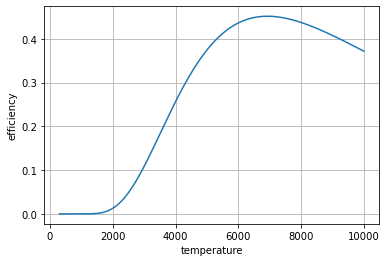

In [218]:
# Imports
from scipy.integrate import quad
from scipy.constants import c, h, k
from numpy import *
import matplotlib.pyplot as plt

# testing imported values
print(f'c: {c}, h: {h}, k: {k}')

# Efficiency function
def eff(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring efficiency values in given temperature range
efficiency = []
T = linspace(300,10000,int(9701))
for t in T:
    efficiency.append(eff(t))

# plotting a graph of temperature v efficiency
plt.plot(T, efficiency)
plt.ylabel('efficiency')
plt.xlabel('temperature')
plt.grid()

## Methods 2 - Graphing Efficiency Derivative
### Imports
Although jupyter only requires imports to be done once, for debugging purposes I prefer to have all imports and functions used in each cell be visible, this allows me to visualise what is going on and problem solve much easier as it lets me view everything at once. Similarly, we want to import our constants: c, h, and k from the Scipy module and the math module, numpy. Our current objective, now that we've seen the graph of efficiency, is to define derivative functions that we can use to form a derivative curve. This will help us understand where the x intercept value is and potentially allow us to see which methods work best based on values of step size that the derivative function takes. 
### Functions
The derivative methods featured here are: Forward Difference (fder), Central Difference (cder), Extrapolated Difference (ED) and the Imaginary Step (IS). Each method has their own accuracy levels based on tested values of H. To save time and make calling these functions simpler, I've given each function the step size value its most accurate with as a default parameter, that way we dont need to add it into the parameters when we call the function. Each function will take the function that needs deriving (f) & a temperature value to put inside the function (t). The equations for each method are as follows:

$$
Forward - Difference = f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}. (3)
$$
$$
Central - Difference = f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}. (3)
$$
$$
Extrapolated - Difference = f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$
$$
Imaginary - Step = f'(x, h)_\text{IS} = \frac{\mathrm{Im}\{f(x + \mathrm{i}h)\}}{h}
$$

where x is our test value, h is our step size and f is our function. We can then define a function that will calculate what the efficiency is for each temperature value as this will be needed for the derivative methods. Although this function is very similar to the previous version: 'eff', I have rewritten it here for reason stated in the introduction, as well as renaming it to 'f' for convention. 
### Data Preparation Method
We can create 4 lists, each list will include corresponding efficiency values for each integar between 300 and 10000. I have used the same code to create our integar list of temperatures as before. To actually obtain our derivative values I have coded a for loop to iterate over all elements in our list of integar temperatures and asked python to calculate what the value of the derivative of efficiency is for each of the temperature values the for loop iterates over. It will do this for every method of differentiation we have looked at and add each calculated value to their respective lists. Python will then plot a graph featuring temperature as its x value, and each list of derivative values as its y values. each curve is labelled by looking at the derivative method used.

C:\Users\saash\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


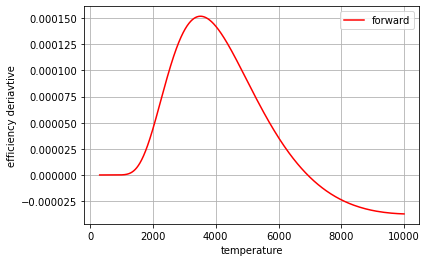

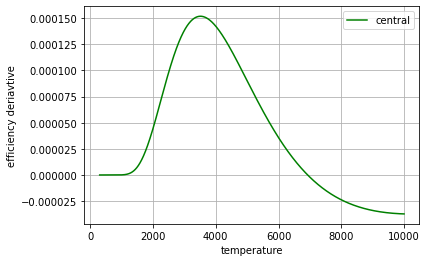

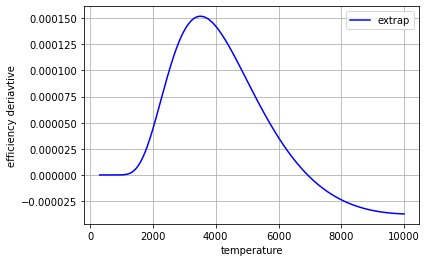

In [219]:
from scipy.constants import c, h, k
from numpy import *

#forward derivative 
def fder(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#Extrapolated derivative
def ED(f,t,h=1e-1):
    return (1/3)*(4*cder(f, t, (0.5*h))-cder(f, t, h))

#Central Derivative
def cder(f,t, h=1e-5):
    return (f(t + h) - f(t - h))/(2*h)

#Imaginary step Derivative (unused), see results
def IS(f, t, h=1e-8):
    return (f(t + 1j * h)).imag / h

def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring efficiency derivative values
d_eff = []
c_eff = []
extrapdiff_eff = []
imaginary = []
T = linspace(300,10000,int(9701))
for t in T:
    d_eff.append(fder(f, t))
    c_eff.append(cder(f,t))
    extrapdiff_eff.append(ED(f,t))
    imaginary.append(IS(f, t))

# plotting temperature v efficiency dervivate
plt.plot(T, d_eff, 'r-', label='forward')
plt.grid()
plt.legend()
plt.ylabel('efficiency deriavtive')
plt.xlabel('temperature')
plt.show()

plt.plot(T, c_eff, 'g-', label='central')
plt.grid()
plt.legend()
plt.ylabel('efficiency deriavtive')
plt.xlabel('temperature')
plt.show()

plt.plot(T, extrapdiff_eff, 'b-', label='extrap')
plt.grid()
plt.legend()
plt.ylabel('efficiency deriavtive')
plt.xlabel('temperature')
plt.show()

## Methods 3 - Finding an expected root
here, we have used a simple for loop to iterate over all the y values of the derivative curve, for this we have chosen the forward difference values although, since this code just obtains a starting value for later methods, the difference method values used for this is not important. We could have used either calculated values from central difference or extrapolated difference if we wanted too. The code looks for a consecutive pair of numbers where the first number is positive and the second is negative, this will tell us roughly where our x intercept of our derivative curve is and we can use that to see what temperature values this occurs at. The idea is, for each value in the list of derivative values, we look at the value with an index value one higher and compare the two. Since the temperature list and calculated derivative list are the same length. The indexes will match each temperature for each respective derivative calculation so we can use the final index for the pair of calculated values to obtain their respective temperature values.

In [220]:
# estimating the root interval
count = 1
for i in d_eff:
    if i > 0 and d_eff[count] < 0:
        print(f'i: {i:.15f}, next value: {d_eff[count]:.15f}')
        print(f'x: {T[count-1]:.12f}, x: {T[count]:.15f}')
        print('root interval found')
    count += 1

i: 0.000000017374990, next value: -0.000000012767565
x: 6928.000000000000, x: 6929.000000000000000
root interval found


## Methods 4 - The bisection algorithm & Regula Falsi

The bisection algorithm takes as input a function $f$ and range $(l, u)$ such that $f(l)$ and $f(u)$ have opposite signs. We *bisect* the range – that is, find the middle, $m$ – and depending on the sign of $f(m)$, we can locate the root in either the lower half $(l, m)$ or upper half $(m, u)$.

For both methods we have used both the forward difference, central difference and extrapolated difference to find a root, these results will be analyzed in the results section

### Imports
the imports are the same as the previous cells, nothing new here
### Functions
f & fder are the same functions as before, its been rewritten for reasons explained in the introduction. Also note, references to y are refering to using the derivative of efficiency as the function since that is the function we are looking at here. The bisection_step function takes only 1 parameter for simplicity sake. Ideally, this one parameter is a tuple containing an upper and lower limit. We can then unpack the tuple inside the function and sensibly name each bound in the tuple. For the bisection step to work, the x value of our x intercept must be between our bounds, we can check this by checking whether the product of y(x lower) and y(x upper) is lower then 0. Simply put, if the product is less then 0, the x intercept value is inbetween the bounds and we can continue with the algorithm. We must then find the midpoint of x upper and x lower, we can do this by diving their sum by 2. We can also print the current values, just for debugging or problem solving purposes (to see if theres something wrong with them or ensure that there isnt somethign wrong with them for example). From here, we must exaime whether the x intercept is between the lower bound and the mid point, or the mid point and upper bound by using the same process as we used to identify whether the intercept is inbetween the initial upper and lower bounds (by finding their product and looking at its sign). If the product is less then 0, the bounds become x lower and the midpoint (which replaces the x upper value), and if the product is above zero, we replace x lower with the mid point and that with x upper become the new bounds. If somehow the bounds are close enough where the product is rounded to 0, we have a safe estimate of where the root is located. From these evaluations we should return our new bounds so that we may reuse the function with the bounds it calculates.
### Looping
we create a variable to monitor iterations, this is called n and n will increase by 1 each time the bounds are recalculated. We set our initial bounds to a sensible range, we can do this by reading our first graph and seeing that the peak is roughly near 6900 to 7000. From here we must call the bisection step function to calculate our first set of bounds. This is the case as we'd like to create a while loop that only stops once the bounds have a reached a point where the difference between the 2 values is low enough for us to assume its located the intercept. For us to use the bounds in the while condition, they must be initalised before the loop. Hence calling the function once before the loop begins. In the while condition, we can say; the corresponding y values of the higher and lower x value must not be 0, this way the loop will continue to run until that is the case, since the bounds will eventually feature an x intercept, the y values will eventually reach 0 and we can use this to control how our loop behaves. Each time the loop iterates over itself, we increase n by 1, ask it to print the iteration number n, so we can see how many iterations its gone through in the prints. We also ask it to print the current bounds its calculated so we can evaulate how quickly its converging based on the bounds themself and the iteration number. Once the while loop condition has been met a print to say the code has finished running is just to ensure that the user is aware a root has been found and the while loop finished properly.

### Bisection method, Forward derviative

In [239]:
# forward derivative
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])

# forward derivative function
def fder(t, h=1e-6):
    return (f(t + h) - f(t)) / h

# bisection step function using forward difference
def bisection_step(bounds):
    Xl, Xu = bounds
    if fder(Xu)*fder(Xl) < 0:
        Xm = (Xu + Xl) / 2
        # to see all useful calculated values
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} fder(Xl): {fder(Xl):.15f} fder(Xm): {fder(Xm):.15f} fder(Xu): {fder(Xu):.15f}')
        if fder(Xu)*fder(Xl) < 0:
            if fder(Xl) * fder(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif fder(Xl) * fder(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif fder(Xl) * fder(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 0
bounds = 6928,6929
print('----',n,'----')
bounds = (bisection_step(bounds))
try:
    while abs(abs(fder(max(bounds))) - abs(fder(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (bisection_step(bounds))

except(TypeError):
    pass

print('root found:', abs(bounds[0]+bounds[1])/2)

---- 0 ----
Xl: 6928.0000000000 Xu: 6929.0000000000 fder(Xl): 0.000000017374990 fder(Xm): 0.000000002220446 fder(Xu): -0.000000012823076
---- 1 ----
Xl: 6928.5000000000 Xu: 6929.0000000000 fder(Xl): 0.000000002220446 fder(Xm): -0.000000005273559 fder(Xu): -0.000000012823076
---- 2 ----
Xl: 6928.5000000000 Xu: 6928.7500000000 fder(Xl): 0.000000002220446 fder(Xm): -0.000000001387779 fder(Xu): -0.000000005273559
---- 3 ----
Xl: 6928.5000000000 Xu: 6928.6250000000 fder(Xl): 0.000000002220446 fder(Xm): 0.000000000555112 fder(Xu): -0.000000001387779
---- 4 ----
Xl: 6928.5625000000 Xu: 6928.6250000000 fder(Xl): 0.000000000555112 fder(Xm): -0.000000000610623 fder(Xu): -0.000000001387779
---- 5 ----
Xl: 6928.5625000000 Xu: 6928.5937500000 fder(Xl): 0.000000000555112 fder(Xm): -0.000000000166533 fder(Xu): -0.000000000610623
---- 6 ----
Xl: 6928.5625000000 Xu: 6928.5781250000 fder(Xl): 0.000000000555112 fder(Xm): 0.000000000111022 fder(Xu): -0.000000000166533
---- 7 ----
Xl: 6928.5703125000 Xu: 6

### Bisection method, extrapolated derviative

In [222]:
# extrapolated derivative
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])
    
# Extrapolated derivative
def ED(t,h=1e-1):
    return (1/3)*(4*cder(f, t, (0.5*h))-cder(f, t, h))

# Central Derivative
def cder(f,t, h=1e-5):
    return (f(t + h) - f(t - h))/(2*h)

# bisection step function using Extrapolated difference
def bisection_step(bounds):
    Xl, Xu = bounds
    if ED(Xu)*ED(Xl) < 0:
        Xm = (Xu + Xl) / 2
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} ED(Xl): {ED(Xl):.15f} ED(Xm): {ED(Xm):.15f} ED(Xu): {ED(Xu):.15f}')
        if ED(Xu)*ED(Xl) < 0:
            if ED(Xl) * ED(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif ED(Xl) * ED(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif ED(Xl) * ED(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 0
bounds = 6928,6929
print('----',n,'----')
bounds = (bisection_step(bounds))
try:
    while abs(abs(ED(max(bounds))) - abs(ED(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (bisection_step(bounds))

except(TypeError):
    pass

print('root found:', abs(bounds[0]+bounds[1])/2)

---- 0 ----
Xl: 6900.0000000000 Xu: 7000.0000000000 ED(Xl): 0.000000871131298 ED(Xm): -0.000000644012357 ED(Xu): -0.000002117209965
---- 1 ----
Xl: 6900.0000000000 Xu: 6950.0000000000 ED(Xl): 0.000000871131298 ED(Xm): 0.000000108282103 ED(Xu): -0.000000644012357
---- 2 ----
Xl: 6925.0000000000 Xu: 6950.0000000000 ED(Xl): 0.000000108282103 ED(Xm): -0.000000269180255 ED(Xu): -0.000000644012357
---- 3 ----
Xl: 6925.0000000000 Xu: 6937.5000000000 ED(Xl): 0.000000108282103 ED(Xm): -0.000000080778389 ED(Xu): -0.000000269180255
---- 4 ----
Xl: 6925.0000000000 Xu: 6931.2500000000 ED(Xl): 0.000000108282103 ED(Xm): 0.000000013669465 ED(Xu): -0.000000080778389
---- 5 ----
Xl: 6928.1250000000 Xu: 6931.2500000000 ED(Xl): 0.000000013669465 ED(Xm): -0.000000033575054 ED(Xu): -0.000000080778389
---- 6 ----
Xl: 6928.1250000000 Xu: 6929.6875000000 ED(Xl): 0.000000013669465 ED(Xm): -0.000000009957945 ED(Xu): -0.000000033575054
---- 7 ----
Xl: 6928.1250000000 Xu: 6928.9062500000 ED(Xl): 0.000000013669465 

### Bisection method, central derviative

In [223]:
# central derivative
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])
    
# Extrapolated derivative
def ED(t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# Central Derivative
def CD(t, h=1e-5):
    return (f(t + h) - f(t - h))/(2*h)

# bisection step function using Extrapolated difference
def bisection_step(bounds):
    Xl, Xu = bounds
    if CD(Xu)*CD(Xl) < 0:
        Xm = (Xu + Xl) / 2
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} CD(Xl): {CD(Xl):.15f} CD(Xm): {CD(Xm):.15f} CD(Xu): {CD(Xu):.15f}')
        if CD(Xu)*CD(Xl) < 0:
            if CD(Xl) * CD(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif CD(Xl) * CD(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif CD(Xl) * CD(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 0
bounds = 6900,7000
print('----',n,'----')
bounds = (bisection_step(bounds))
try:
    while abs(abs(CD(max(bounds))) - abs(CD(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (bisection_step(bounds))

except(TypeError):
    pass

print('root found:', abs(bounds[0]+bounds[1])/2)

---- 0 ----
Xl: 6900.0000000000 Xu: 7000.0000000000 CD(Xl): 0.000000871136496 CD(Xm): -0.000000644018172 CD(Xu): -0.000002117203635
---- 1 ----
Xl: 6900.0000000000 Xu: 6950.0000000000 CD(Xl): 0.000000871136496 CD(Xm): 0.000000108288378 CD(Xu): -0.000000644018172
---- 2 ----
Xl: 6925.0000000000 Xu: 6950.0000000000 CD(Xl): 0.000000108288378 CD(Xm): -0.000000269170797 CD(Xu): -0.000000644018172
---- 3 ----
Xl: 6925.0000000000 Xu: 6937.5000000000 CD(Xl): 0.000000108288378 CD(Xm): -0.000000080779827 CD(Xu): -0.000000269170797
---- 4 ----
Xl: 6925.0000000000 Xu: 6931.2500000000 CD(Xl): 0.000000108288378 CD(Xm): 0.000000013666845 CD(Xu): -0.000000080779827
---- 5 ----
Xl: 6928.1250000000 Xu: 6931.2500000000 CD(Xl): 0.000000013666845 CD(Xm): -0.000000033584246 CD(Xu): -0.000000080779827
---- 6 ----
Xl: 6928.1250000000 Xu: 6929.6875000000 CD(Xl): 0.000000013666845 CD(Xm): -0.000000009950374 CD(Xu): -0.000000033584246
---- 7 ----
Xl: 6928.1250000000 Xu: 6928.9062500000 CD(Xl): 0.000000013666845 

## Regula falsi

This algorithm is very similar but tries to make a more sensible guess at the root than simply the midpoint of the range. Instead, we calculate the intersection point of a straight line through $(l, f(l))$ and $(u, f(u))$, which turns out to be
$$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}
$$

The only difference in code is the way the mid point is calculated, every other line is the exact same so splitting up these algorithms to have their own method sections seems redundant as results will be analysed in the results section.

### Regula Falsi forward derviative

In [238]:
# forward difference
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])

# Forward difference
def fder(t, h=1e-6):
    return (f(t + h) - f(t)) / h

# Regula falsi with forward difference
def Regula(bounds):
    Xl, Xu = bounds
    if fder(Xu)*fder(Xl) < 0:
        Xm = (Xl*fder(Xu) - Xu*fder(Xl))/(fder(Xu) - fder(Xl))
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} fder(Xl): {fder(Xl):.15f} fder(Xm): {fder(Xm):.15f} fder(Xu): {fder(Xu):.15f}')
        if fder(Xu)*fder(Xl) < 0:
            if fder(Xl) * fder(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif fder(Xl) * fder(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif fder(Xl) * fder(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 0
bounds = 6900,7000
print('----',n,'----')
bounds = (Regula(bounds))
try:
    while abs(abs(fder(max(bounds))) - abs(fder(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (Regula(bounds))

except(TypeError):
    pass

print('root found:', bounds)

---- 0 ----
Xl: 6900.0000000000 Xu: 7000.0000000000 fder(Xl): 0.000000871303030 fder(Xm): -0.000000017319479 fder(Xu): -0.000002117195308
---- 1 ----
Xl: 6900.0000000000 Xu: 6929.1552121257 fder(Xl): 0.000000871303030 fder(Xm): -0.000000000444089 fder(Xu): -0.000000017319479
---- 2 ----
Xl: 6900.0000000000 Xu: 6928.5869696105 fder(Xl): 0.000000871303030 fder(Xm): 0.000000000055511 fder(Xu): -0.000000000444089
---- 3 ----
Xl: 6928.5724067121 Xu: 6928.5869696105 fder(Xl): 0.000000000055511 fder(Xm): 0.000000000166533 fder(Xu): -0.000000000444089
---- 4 ----
Xl: 6928.5740248119 Xu: 6928.5869696105 fder(Xl): 0.000000000166533 fder(Xm): -0.000000000055511 fder(Xu): -0.000000000444089
---- 5 ----
Xl: 6928.5740248119 Xu: 6928.5775552115 fder(Xl): 0.000000000166533 fder(Xm): -0.000000000277556 fder(Xu): -0.000000000055511
---- 6 ----
Xl: 6928.5740248119 Xu: 6928.5766726116 fder(Xl): 0.000000000166533 fder(Xm): -0.000000000111022 fder(Xu): -0.000000000277556
---- 7 ----
Xl: 6928.5740248119 Xu: 

### Regula Falsi extrapolated derviative

In [225]:
# extrapolated difference
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])
    
#Extrapolated derivative
def ED(t,h=1e-1):
    return (1/3)*(4*cder(f, t, (0.5*h))-cder(f, t, h))

#Central Derivative
def cder(f,t, h=1e-5):
    return (f(t + h) - f(t - h))/(2*h)

# Regula falsi with extrapolated difference
def Regula(bounds):
    Xl, Xu = bounds
    if ED(Xu)*ED(Xl) < 0:
        Xm = (Xl*ED(Xu) - Xu*ED(Xl))/(ED(Xu) - ED(Xl))
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} ED(Xl): {ED(Xl):.15f} ED(Xm): {ED(Xm):.15f} ED(Xu): {ED(Xu):.15f}')
        if ED(Xu)*ED(Xl) < 0:
            if ED(Xl) * ED(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif ED(Xl) * ED(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif ED(Xl) * ED(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 1
bounds = 6900,7000
print('----',n,'----')
bounds = (Regula(bounds))
try:
    while abs(abs(ED(max(bounds))) - abs(ED(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (Regula(bounds))

except(TypeError):
    pass

print('root found:', abs(bounds[0]+bounds[1])/2)

---- 1 ----
Xl: 6900.0000000000 Xu: 7000.0000000000 ED(Xl): 0.000000871131298 ED(Xm): -0.000000017357753 ED(Xu): -0.000002117209965
---- 2 ----
Xl: 6900.0000000000 Xu: 6929.1509978705 ED(Xl): 0.000000871131298 ED(Xm): -0.000000000137643 ED(Xu): -0.000000017357753
---- 3 ----
Xl: 6900.0000000000 Xu: 6928.5814963940 ED(Xl): 0.000000871131298 ED(Xm): -0.000000000001091 ED(Xu): -0.000000000137643
---- 4 ----
Xl: 6900.0000000000 Xu: 6928.5769810960 ED(Xl): 0.000000871131298 ED(Xm): -0.000000000000009 ED(Xu): -0.000000000001091
---- 5 ----
Xl: 6900.0000000000 Xu: 6928.5769452919 ED(Xl): 0.000000871131298 ED(Xm): -0.000000000000001 ED(Xu): -0.000000000000009
---- 6 ----
Xl: 6900.0000000000 Xu: 6928.5769449945 ED(Xl): 0.000000871131298 ED(Xm): -0.000000000000001 ED(Xu): -0.000000000000001
---- 7 ----
Xl: 6900.0000000000 Xu: 6928.5769449580 ED(Xl): 0.000000871131298 ED(Xm): 0.000000000000002 ED(Xu): -0.000000000000001
root found: 6928.5769449383115


### Regula Falsi central derviative

In [226]:
# central difference
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x:  (x**3) / (exp(x)-1) 
    return ( 15/pi**4 ) * (quad(effT, lower ,upper)[0])
    
#Extrapolated derivative
def ED(t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

#Central Derivative
def CD(t, h=1e-5):
    return (f(t + h) - f(t - h))/(2*h)

# Regula falsi with extrapolated difference
def Regula(bounds):
    Xl, Xu = bounds
    if CD(Xu)*CD(Xl) < 0:
        Xm = (Xl*CD(Xu) - Xu*CD(Xl))/(CD(Xu) - CD(Xl))
        print(f'Xl: {Xl:.10f} Xu: {Xu:.10f} CD(Xl): {CD(Xl):.15f} CD(Xm): {CD(Xm):.15f} CD(Xu): {CD(Xu):.15f}')
        if CD(Xu)*CD(Xl) < 0:
            if CD(Xl) * CD(Xm) < 0:
                Xu = Xm
                return (Xl, Xu)
            elif CD(Xl) * CD(Xm) > 0:
                Xl = Xm
                return (Xl, Xu)
            elif CD(Xl) * CD(Xm) == 0:
                Root = Xm
                return Root
    else:
        print('wrong bounds')

# looping
n = 1
bounds = 6900,7000
print('----',n,'----')
bounds = (Regula(bounds))
try:
    while abs(abs(CD(max(bounds))) - abs(CD(min(bounds)))) > 1e-15:
        n += 1
        print('----',n,'----')
        bounds = (Regula(bounds))

except(TypeError):
    pass

print(bounds)

---- 1 ----
Xl: 6900.0000000000 Xu: 7000.0000000000 CD(Xl): 0.000000871136496 CD(Xm): -0.000000017366664 CD(Xu): -0.000002117203635
---- 2 ----
Xl: 6900.0000000000 Xu: 6929.1511828678 CD(Xl): 0.000000871136496 CD(Xm): -0.000000000136002 CD(Xu): -0.000000017366664
---- 3 ----
Xl: 6900.0000000000 Xu: 6928.5813944742 CD(Xl): 0.000000871136496 CD(Xm): 0.000000000000000 CD(Xu): -0.000000000136002
6928.576933027294


## Methods 5 -  The Newton-Raphson method
The Newton-Raphson algorithm involves linearising the function at some guess $x_0$ – that is, we follow the *derivative* down to the $x$-axis rather than the function itself:

Mathematically, 
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

Note: I have used every combination of methods for finding the first and second derivative, the results will be analyzed in the results section

### Imports
the imports are the same as before, nothing new here.
### Functions
for the newton step function, we will be using the extrapolated derivative (and thereforem the central derivative as its used to calculated the extrapolated derivative) as ED (and CD). These functions were defined before but are being redefined with newer names for reasons stated in the introduction. The newton step function takes a 2 parameters, the function its applying itself too, and an x value to evaluate the function at. We simply have it return the Mathematical equation we have written above. Since, in the fraction, whatever derivative of f is on the numerator (e.g the *first/second* derivative), we'll always be taking the next derivative in the denominator (e.g the *second/third* derivative). As this is the case, we can simply state that the we want f to be the numerator (whatever f is will depend on the parameters), and the denominator will be the direct derivative of f which we can find by having it run through the extrapolated derivative function. The function for f has been taken from previous cells with no changes. We need a function to find the derivative of f and return a function, which is the 'derivative' functions purpose. The idea is that, once the newton step function is called, it will be given what the derivative function returns as that the y we're looking at since we want to find the x intercept of the derivative curve. the derivative function will apply the ED function to the original efficiency equation and give that derived function to the newton step function to use as f. This will actually repeat itself as the denominator of the fraction in the newton step function uses the ED function. f, which is currently the first derivative of the efficiency equation will get passed to the ED function and it'll calculate the second derivative value at the given t value (this also happens with the first derivative) and this will then be passed back to the newton step function so it can numerically calculate the fraction and return the numerical result of the equation for iterative use.
### Looping
we start by defining a guess value, we can start at any sensible value. For the same reasons as calling the bisection function before the while loop as before, we call the newton step before the while loop here as the same principle applies. we want to have the while loop run until the difference between the current value it calculates and the next value is less then a reasonably small number that we can define as epsilon. We also create variable to monitor the iteration count called n. In the while loop, we state that while the absolute value of the difference between current x value (x) and the next value up (xU) is greater then epsilon, we'd like our while loop to continue looping. We must then redefine our 'current' value of x as a new one is being calculated. we do this by saying that our next current value of x, is our old 'next x value up' (xU) value, and our actual new x value (xU) is whatever the newton step function returns. we then increase the iteration count n by 1 and print x along with the iteration count so we can monitor the speed of the process.



### Newton step ED - ED 

In [227]:
# using ED - ED
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/ED(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return ED(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')

x: 6761.609933904368, iteration: 1.00 
x: 6921.284925355427, iteration: 2.00 
x: 6928.5621320316195, iteration: 3.00 
x: 6928.57694498089, iteration: 4.00 
x: 6928.576944876874, iteration: 5.00 
x: 6928.576944956415, iteration: 6.00 
x: 6928.576945109377, iteration: 7.00 
x: 6928.576945017599, iteration: 8.00 
x: 6928.576945060429, iteration: 9.00 
x: 6928.57694488911, iteration: 10.00 
x: 6928.576944993125, iteration: 11.00 


### Newton step CD - ED 

In [228]:
# using CD - ED
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/ED(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return CD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')

x: 6761.134856242616, iteration: 1.00 
x: 6920.99085178082, iteration: 2.00 
x: 6928.669961793181, iteration: 3.00 
x: 6928.575814844239, iteration: 4.00 
x: 6928.5771151538365, iteration: 5.00 
x: 6928.576561648301, iteration: 6.00 
x: 6928.577276359439, iteration: 7.00 
x: 6928.577096070977, iteration: 8.00 
x: 6928.577639549238, iteration: 9.00 
x: 6928.57709672656, iteration: 10.00 
x: 6928.5767286284, iteration: 11.00 
x: 6928.577090074183, iteration: 12.00 
x: 6928.576722427124, iteration: 13.00 
x: 6928.57635136961, iteration: 14.00 


### Newton step FD - ED 

In [229]:
# using FD - ED 
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/ED(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return FD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')

x: 6723.79213483146, iteration: 1.00 
x: 6898.2413959152045, iteration: 2.00 
x: 6934.215496634629, iteration: 3.00 
x: 6928.644587543719, iteration: 4.00 
x: 6928.57752872019, iteration: 5.00 
x: 6928.5790994008175, iteration: 6.00 


### Newton step ED - FD 

In [230]:
# using ED - FD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/FD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return ED(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')

x: 6723.79083771161, iteration: 1.00 
x: 6917.307209034015, iteration: 2.00 
x: 6928.371254285182, iteration: 3.00 
x: 6928.59098975577, iteration: 4.00 
x: 6928.57673233341, iteration: 5.00 
x: 6928.576903540307, iteration: 6.00 
x: 6928.576946989026, iteration: 7.00 
x: 6928.576945429026, iteration: 8.00 
x: 6928.576944938342, iteration: 9.00 
x: 6928.576945115858, iteration: 10.00 
x: 6928.576945039387, iteration: 11.00 
x: 6928.5769450161315, iteration: 12.00 


### Newton step CD - FD 

In [231]:
'''
# using CD - FD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/FD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return CD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')
'''
print('doesnt find root')

doesnt find root


### Newton step FD - FD 

In [232]:
'''
# using FD - FD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/FD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return FD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')
'''
print('doesnt find root')

doesnt find root


### Newton step ED - CD 

In [233]:
# using ED - CD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/CD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return ED(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')

x: 6761.134917397556, iteration: 1.00 
x: 6919.576622217899, iteration: 2.00 
x: 6928.524971288465, iteration: 3.00 
x: 6928.577374372981, iteration: 4.00 
x: 6928.576958062185, iteration: 5.00 
x: 6928.576945103498, iteration: 6.00 
x: 6928.576944976839, iteration: 7.00 
x: 6928.576944836338, iteration: 8.00 
x: 6928.57694511328, iteration: 9.00 


### Newton step CD - CD 

In [234]:
'''
# using CD - CD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/CD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return CD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')
'''
print('doesnt find root')

doesnt find root


### Newton step FD - CD 

In [235]:
'''
# using FD - CD
from scipy.constants import c, h, k
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt

# central difference for use in extrapolated difference formula
def CD(f,t,h=1e-5):
    return (f(t+(h/2))-f(t-(h/2)))/h

# extrapolated difference
def ED(f,t,h=1e-1):
    return (1/3)*(4*CD(f, t, (0.5*h))-CD(f, t, h))

# newton step function
def newton(f,t):
    return t -(f(t)/CD(f,t))

# forward difference
def FD(f, t, h=1e-6):
    return (f(t + h) - f(t)) / h

#efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# aquiring derivative function
def derivative(t):
    return FD(f,t)


# looping
x = 6000
xU = newton(derivative,x)
epsilon = 1e-8
n = 0
while abs(x-xU)>epsilon:
    xU,x = newton(derivative, xU), xU
    n += 1
    print(f'x: {x}, iteration: {n:.2f} ')
'''
print('doesnt find root')

doesnt find root


## result compilation

In [256]:
'''
bisection step using forward difference after 13 iterations from 6900,7000
root found: 6928.5736083984375

bisection step using extrapolated difference after 30 iterations from 6900,7000
root found: 6928.576945001259

bisection step using central difference after 17 iterations from 6900,7000
root found: 6928.576850891113

Regula falsi using forwad difference after 9 iterations from 6900,7000
root found: 6928.57495154182

Regula falsi using extrapolated difference after 7 iterations from 6900,7000
root found: 6928.5769449383115

Regula falsi using central difference after 3 iterations from 6900,7000
root found: 6928.576933027294

newton step using ED - ED
11 iterations, root was 6928.576944993125

newton step using CD - ED
14 iterations, root was 6928.57635136961

newton step using FD - ED
5 iterations, root was 6928.5790994008175

newton step ED - FD
x: 6928.5769450161315, iteration: 12.00

newton step ED - CD
x: 6928.57694511328, iteration: 9.00 
'''

#Efficiency function
def f(t):
    lambda1 = 390e-9
    lambda2 = 750e-9
    upper = (h*c)/(lambda1*k*t)
    lower = (h*c)/(lambda2*k*t)
    effT = lambda x: ( 15/pi**4 ) * ( (x**3) / (exp(x)-1) )
    return (quad(effT, lower ,upper)[0])

# useful results
average = ((6928.5736083984375 + 6928.576945001259 + 6928.576850891113) + (6928.57495154182 + 6928.5769449383115 + 6928.576933027294) + (6928.576944993125 + 6928.57635136961 + 6928.5790994008175) + (6928.5769450161315) + 6928.57694511328)/11
FDbisection_error = abs(average - 6928.5736083984375)
EDbisection_error = abs(average - 6928.576945001259)
CDbisection_error = abs(average - 6928.576850891113)
FDregula_error = abs(average - 6928.57495154182)
EDregula_error = abs(average - 6928.5769449383115)
CDregula_error = abs(average - 6928.576933027294)
EDEDnewton_error = abs(average - 6928.576944993125)
CDEDnewton_error = abs(average - 6928.57635136961)
FDEDnewton_error = abs(average - 6928.5790994008175)
EDFDnewton_error = abs(average - 6928.5769450161315)
EDCDnewton_error = abs(average - 6928.57694511328)

# printing useful results
print(f'most accurate result: {average}')
print('---------------')
print(f'FD bisection error: {FDbisection_error}')
print(f'ED bisection error: {EDbisection_error}')
print(f'CD bisection error: {CDbisection_error}')
print('---------------')
print(f'FD regula error: {FDregula_error}')
print(f'ED regula error: {EDregula_error}')
print(f'CD regula error: {CDregula_error}')
print('---------------')
print(f'FD - ED newton error: {FDEDnewton_error}')
print(f'ED - ED newton error: {EDEDnewton_error}')
print(f'CD - ED newton error: {CDEDnewton_error}')
print(f'ED - FD newton error: {EDFDnewton_error}')
print(f'ED - CD newton error: {EDCDnewton_error}')
print('---------------')
print(f'tungstens melting point is 3687k, the efficiency of a bulb operating at that temperature is {f(3687)*100}%') # (1)
print(f'the estimated maximum efficieny of an incandescent light bulb is when temperature is {average}, at that temperature, efficency is {f(average)*100}%')
print(f'secondary source for max efficiency: {f(6989)*100}% occurs at T: 6989') # (4)
print(f'practical efficiency: {f(3300)*100}') # (5)
print(f'--------------')

most accurate result: 6928.5765926992
---------------
FD bisection error: 0.0029843007623640005
ED bisection error: 0.00035230205958214356
CD bisection error: 0.00025819191341724945
---------------
FD regula error: 0.001641157379708602
ED regula error: 0.00035223911163484445
CD regula error: 0.00034032809435302624
---------------
FD - ED newton error: 0.002506701617676299
ED - ED newton error: 0.0003522939250615309
CD - ED newton error: 0.0002413295896985801
ED - FD newton error: 0.00035231693163950695
ED - CD newton error: 0.0003524140802255715
---------------
tungstens melting point is 3687k, the efficiency of a bulb operating at that temperature is 21.05273095772901%
the estimated maximum efficieny of an incandescent light bulb is when temperature is 6928.5765926992, at that temperature, efficency is 45.16938402945044%
secondary source for max efficiency: 45.16392521870655% occurs at T: 6989
practical efficiency: 15.20448321170392
--------------


## Discussion
from our methods, we have used many different ways of obtaining a maximum efficiency and taken the average of roots that those methods calculated, from there we put that average temperature back into the efficiency equation to calculate the efficiency at that operation temperature. Assuming that average is the most accurate value we can find, we can then estimate the errors of the final result for each method by finding the difference between those seperate values and the average value. Interestingly enough, from the data I've found, using the central difference derivative method for the first derivative, and the extrapolated difference to find the second derivative, along with the newton step method gave the most accurate result (this is assuming there are no anomolous results affecting the average, this is a safe assumption to make as all the results are extremely close together). Another interesting observation we can make from looking at the results we have obtained is that the FD derivative method is consistently inaccurate when compared to the other 2 derivative methods. This could be due to subtractive cancellation. Had we never tested the accuracy of each of these values, and gone off the graphs from 'Methods 2 - Graphing Efficiency Derivative', we'd have never been able to realise that FD isn't as accurate as the other methods since the graphs are near identical at the scale we have them at. From referrence (4), we can also determine that both our result and model are fairly accurate, as we were able to calculate a very similar root (the difference being caused by a slight difference in tested wavelength range). Along with this similarity, we have also obtained a very similar efficiency value for their maximum temperature. 
## Conclusion
One thing that went surprisingly well with this project was how easy it was to experiment with different derivative methods, all that needed to be done was replacing which method was called, nothing else. One thing that went surprisingly well with this project was how easy it was to experiment with different derivative methods, all that needed to be done was replacing which method was called, nothing else. One thing that could've been done better was the error analysis overall. It would've been interesting to have values for how accurate each method is seperately, and weight the average based on the error of each contributing value. Although the quad function returns an error, that error would not be the error we're looking for as that error applies to the Gaussian Quadrate function inbuilt into the Scipy library, therefore the only thing that affects that error would be the value of t. This is seemingly useless as the range for t is the same across all derivative methods and therefore, the error that quad would give us wouldn't help us evaluate which derivative method has the smallest absolute error (without comparing all the results together as i have). I would also like to explore new ways of finding roots, or searching through lists or potentially making our current suggested temperature more accurate. An example of a new type of method I would have liked to implement is either the Binary Search for searching for the root interval or the Golden Ratio search for the same purpose.



## Referrences 
(1) https://www.rsc.org/periodic-table/element/74/tungstenW
M. Haynes, ed., CRC Handbook of Chemistry and Physics, CRC Press/Taylor and Francis, Boca Raton, FL, 95th Edition, 2015. access date: 09/03/2021

(2) http://spiff.rit.edu/classes/phys317/lectures/planck.html 
MWR., Blackbody Radiation and the Planck Function, 2007 access date: 12/03/2021

(3) https://www.lehigh.edu/~ineng2/clipper/notes/NumDif.htm 
HELM (2008), Numerical Differentiation, 2008 access date: 12/03/2021

(4) https://www.researchgate.net/publication/241576537_Efficiency_and_efficacy_of_incandescent_lampsAgrawal 
Dulli & Leff, Harvey & Menon, V.. (1996). Efficiency and efficacy of incandescent lamps. American Journal of Physics - AMER J PHYS. 64. 649-654. 10.1119/1.18260. access date: 12/03/2021

(5) https://www.sciencedirect.com/topics/engineering/filament-lamp 
Filament Lamp - an overview, ScienceDirect Topics, Engineering Materials 1 (Fifth Edition), 2019 access date: 12/03/2021



In [255]:
import io
from IPython.nbformat import current
filepath = 'bulb.ipynb'
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

3917
